In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/s4e11-dataset/sample_submission.csv
/kaggle/input/s4e11-dataset/train.csv
/kaggle/input/s4e11-dataset/test.csv


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('/kaggle/input/s4e11-dataset/train.csv')
test = pd.read_csv('/kaggle/input/s4e11-dataset/test.csv')

Exploring train dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [12]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


**Summary:**
Dataset has no null values, but there are some columns that are very specific to the Working professional and some those are very specific to the students.

Identify working professional or student using : Working Professional or Student 

Working Professional:

1. Profession
2. Work Pressure
3. Job Satisfaction

Students:
1. Working Professional:
2. Academic Pressure
3. CGPA
4. Study Satisfaction

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>],
       [<Axes: title={'center': 'Work Pressure'}>,
        <Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>],
       [<Axes: title={'center': 'Job Satisfaction'}>,
        <Axes: title={'center': 'Work/Study Hours'}>,
        <Axes: title={'center': 'Financial Stress'}>],
       [<Axes: title={'center': 'Depression'}>, <Axes: >, <Axes: >]],
      dtype=object)

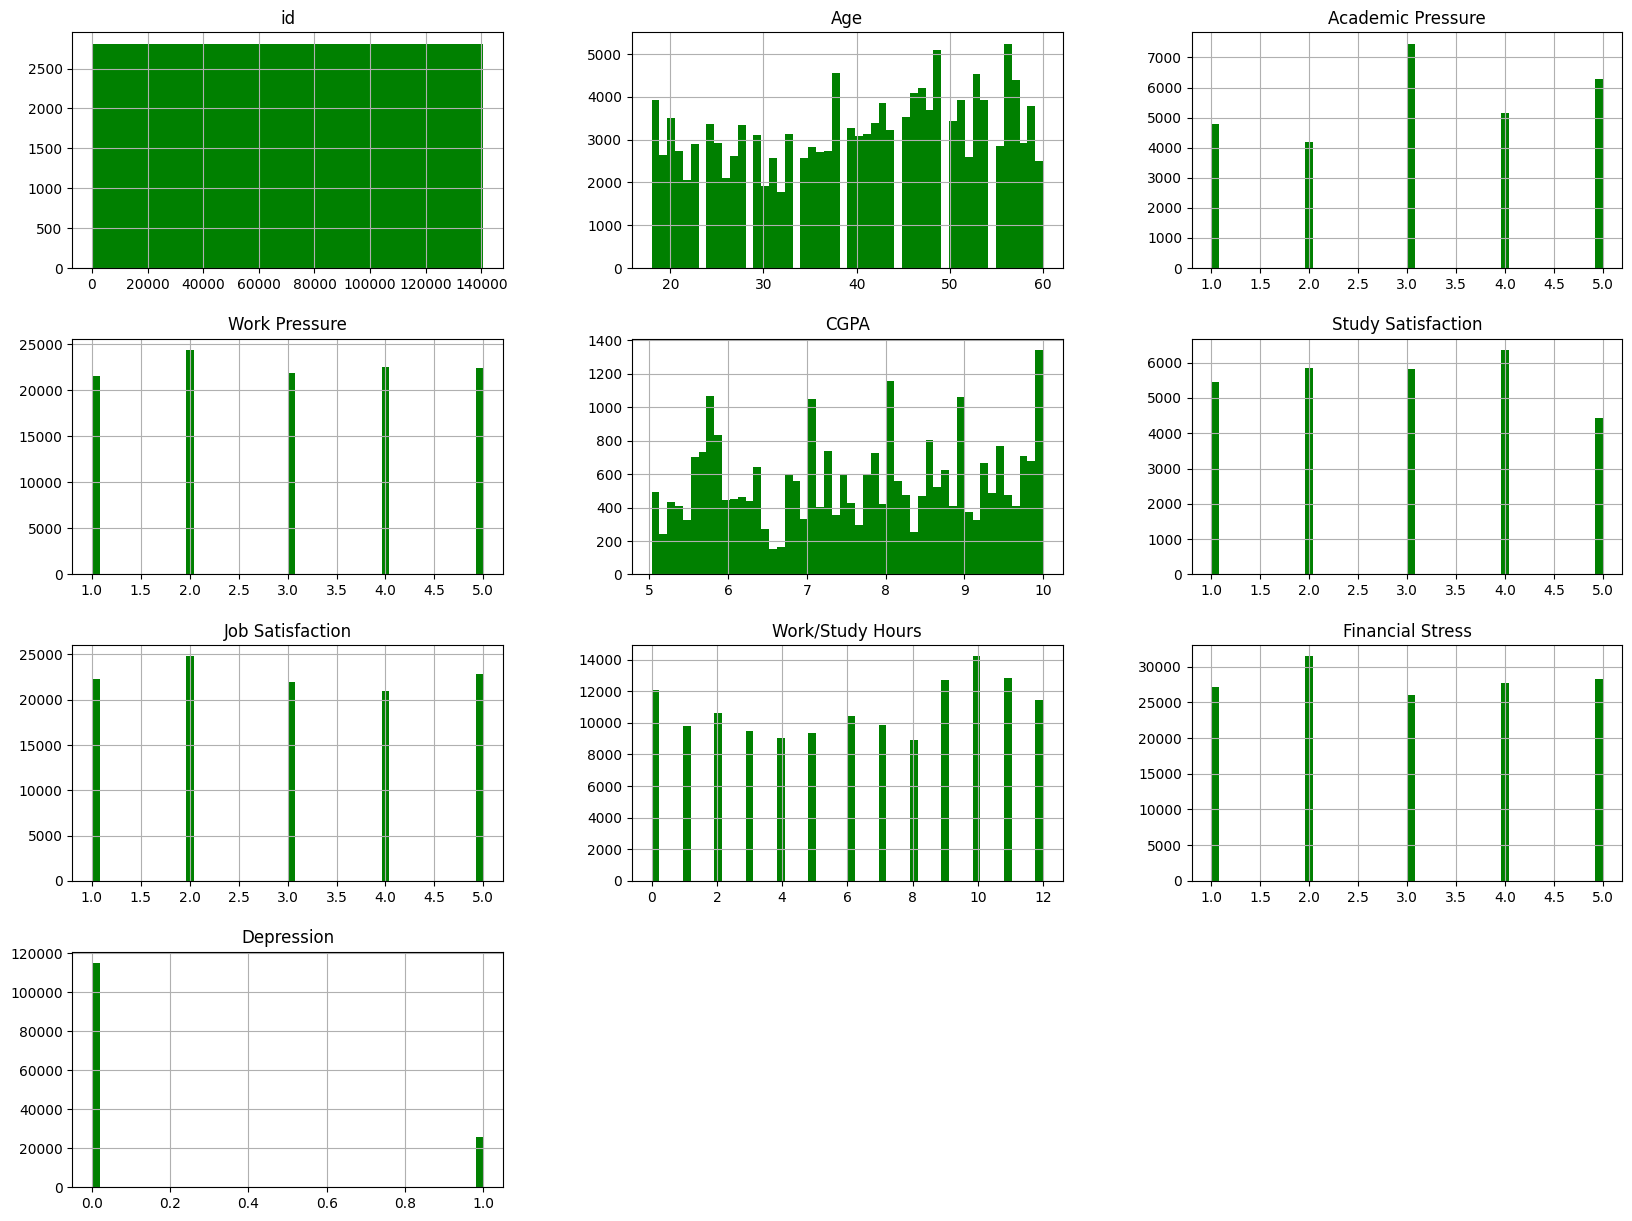

In [7]:
train.hist(bins=50, figsize=(20, 15), color ='green')

**Understanding each variable**

In [135]:
#For numerical variables, we can use the describe method to understand the value range and identify outliers.
train.describe()

#There seems to be no outliers, but we can double check Work/Study Hours to check if there any outlier or not

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [141]:
def outlier_check(df):
    '''This will help us to check for the outliers in the numerical columns'''
    # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Step 2: Calculate the upper and lower bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Identify outliers
    outliers = df[(df < lower_bound) | (df > upper_bound)]

    # Output message based on the presence of outliers
    if outliers.empty:
        return "There are no outliers."
    else:
        return f"Outliers present: {outliers.values}"


result = outlier_check(train['Work/Study Hours'])
print(result)


There are no outliers.


There are no outliers, let's explore the categorical variables

In [143]:
city_counts = train['City'].value_counts()
incorrect_cities = []

for city, count in city_counts.items():
    if count < 50:
        incorrect_cities.append(city)

train['City'] = train['City'].replace(incorrect_cities, "Others")


In [144]:
train['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [151]:
prof_check = train['Profession'].value_counts().reset_index()
prof_check.columns = ['Profession', 'Pop']
rare_professions = prof_check[prof_check['Pop'] < 50]
print(rare_professions)

              Profession  Pop
35               Student    7
36              Academic    5
37            Profession    3
38                Yogesh    3
39                   BCA    3
40            Unemployed    3
41                   LLM    2
42                   PhD    2
43                   MBA    2
44                   Dev    1
45                    BE    1
46     Family Consultant    1
47         Visakhapatnam    1
48                Pranav    1
49               Analyst    1
50                  M.Ed    1
51              Moderate    1
52                Nagpur    1
53                  B.Ed    1
54                Unveil    1
55                 Patna    1
56                  MBBS    1
57  Working Professional    1
58        Medical Doctor    1
59                   BBA    1
60          City Manager    1
61           FamilyVirar    1
62                 B.Com    1
63                Yuvraj    1


In [154]:
incorrect_prof = []

for index, row in prof_check.iterrows():
    if row['Pop'] < 50:
        incorrect_prof.append(row['Profession'])

train['Profession'] = train['Profession'].replace(incorrect_prof, "Others")


In [169]:
train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
Name: count, dtype: int64

In [168]:
train['Sleep_Duration_bucket'] = None

for index, value in train['Sleep Duration'].items():
    if value == 'Less than 5 hours':
        train.loc[index, 'Sleep_Duration_bucket'] = 1
    elif value == '5-6 hours':
        train.loc[index, 'Sleep_Duration_bucket'] = 2
    elif value == '7-8 hours':
        train.loc[index, 'Sleep_Duration_bucket'] = 3
    elif value == 'More than 8 hours':
        train.loc[index, 'Sleep_Duration_bucket'] = 4

train.dropna(subset=['Sleep_Duration_bucket'], inplace=True)

In [170]:
train['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49670
Unhealthy            46201
Healthy              44723
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [171]:
train['Dietary_Habits_bucket'] = None

for index, value in train['Dietary Habits'].items():
    if value == 'Unhealthy':
        train.loc[index, 'Dietary_Habits_bucket'] = 1
    elif value == 'Moderate':
        train.loc[index, 'Dietary_Habits_bucket'] = 2
    elif value == 'Healthy':
        train.loc[index, 'Dietary_Habits_bucket'] = 3

train.dropna(subset=['Dietary_Habits_bucket'], inplace=True)

In [180]:
temp = degree_counts[degree_counts['Count']<50]
print(temp['Count'].sum())

114


In [181]:
degree_counts = train['Degree'].value_counts().reset_index()
degree_counts.columns = ['Degree', 'Count']

incorrect_degree = []

for index, row in degree_counts.iterrows():
    if row['Count'] < 50:
        incorrect_degree.append(row['Degree'])

train['Degree'] = train['Degree'].replace(incorrect_degree, "Others")

In [184]:
train['Have you ever had suicidal thoughts ?'].value_counts()

train['Suicidal_thougts'] = None

for index, value in train['Have you ever had suicidal thoughts ?'].items():
    if value == 'Yes':
        train.loc[index, 'Suicidal_thougts'] = 0
    elif value == 'No':
        train.loc[index, 'Suicidal_thougts'] = 1


In [186]:
train['Family History of Mental Illness'].value_counts()

train['Family_history'] = None

for index, value in train['Family History of Mental Illness'].items():
    if value == 'Yes':
        train.loc[index, 'Family_history'] = 0
    elif value == 'No':
        train.loc[index, 'Family_history'] = 1


In [8]:
cat_var = []
num_var = []
for column in train.columns:
    if train[column].dtype == 'object':
        cat_var.append(column)
    else:
        num_var.append(column)

print('Categorical variables in the dataset are :',cat_var)
print('Numerical variables in the dataset are :',num_var)

Categorical variables in the dataset are : ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
Numerical variables in the dataset are : ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']


In [56]:
profession = train.groupby(['Working Professional or Student', 'Age']).agg(Number_of_people=('id', 'count')).reset_index()
profession = profession.sort_values(by='Age', ascending=True)

wp = profession[profession['Working Professional or Student'] == "Working Professional"]
student = profession[profession['Working Professional or Student'] == "Student"]



,Working Professional or Student,Age,Number_of_people
0,Student,18.0,1587
34,Working Professional,18.0,2334
1,Student,19.0,1560
35,Working Professional,19.0,1074
2,Student,20.0,2237


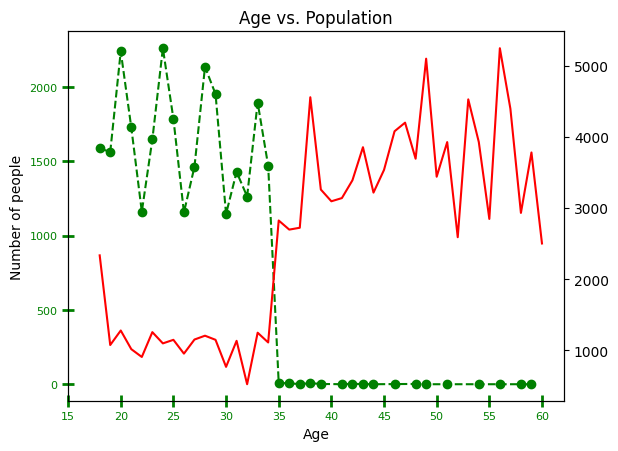

In [64]:
fig, ax = plt.subplots()

#Student
ax.plot(student['Age'], student['Number_of_people'], color ='g', linestyle="--", marker ="o")

#Working professional
ax2 = ax.twinx()
ax2.plot(wp['Age'], wp['Number_of_people'], color ='r', linestyle="-", marker ="")

#Creating labels
ax.set_title("Age vs. Population")
ax.set_xlabel("Age")
ax.set_ylabel("Number of people")

# Adjust tick intervals for x-axis
ax.set_xticks(range(15, 65, 5)) 

# Customize tick parameters for x-axis and y-axis
ax.tick_params(axis='x', colors='green', length=8, width=2, direction='inout', labelsize=8)
ax.tick_params(axis='y', colors='green', length=8, width=2, direction='inout', labelsize=8)  

plt.show()


In [129]:
age_dep = train.groupby('Age')['Depression'].agg(Count='count', Sum='sum').reset_index()
age_dep.columns = ['Age','Pop','Dep_pop']
age_dep['Dep %'] = round((age_dep['Dep_pop'] / age_dep['Pop']) * 100,1)
age_dep.head()


,Age,Pop,Dep_pop,Dep %
0,18.0,3921,2781,70.9
1,19.0,2634,1665,63.2
2,20.0,3515,2184,62.1
3,21.0,2742,1841,67.1
4,22.0,2066,1088,52.7


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


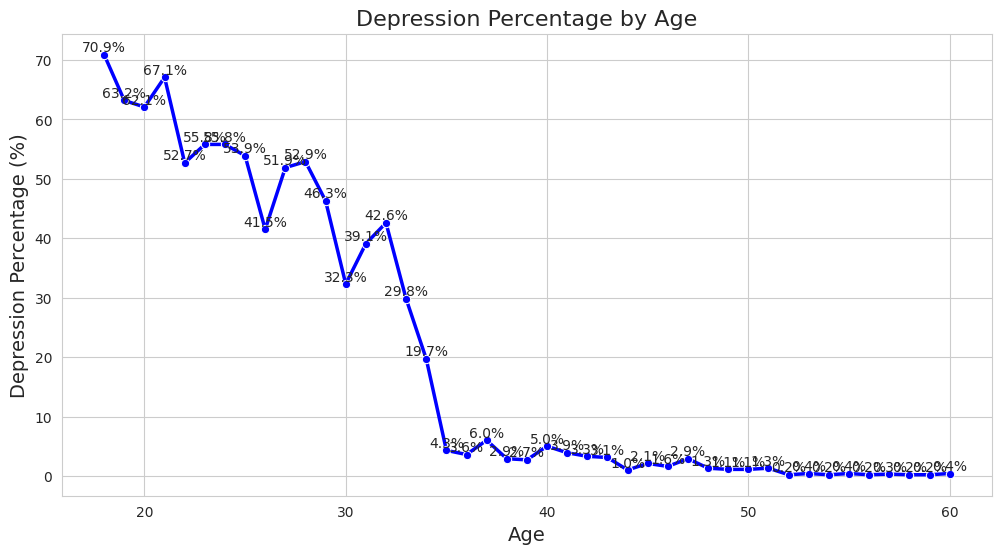

In [132]:

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

line_plot = sns.lineplot(
    x='Age',
    y='Dep %',
    data=age_dep,
    marker='o',
    color='blue',
    linewidth=2.5
)

# Setting title and labels
line_plot.set_title("Depression Percentage by Age", fontsize=16)
line_plot.set_xlabel("Age", fontsize=14)
line_plot.set_ylabel("Depression Percentage (%)", fontsize=14)

#Add grid lines
plt.grid(visible=True)

# Annotate points with their values
for i, row in age_dep.iterrows():
    plt.text(
        row['Age'], 
        row['Dep %'], 
        f"{row['Dep %']:.1f}%", 
        fontsize=10,
        horizontalalignment='center',
        verticalalignment='bottom'
    )

plt.show()


       City  Count
30    Mihir      7
31  Nandini      4
32     Mahi      3
33    Vidya      3
34     City      3
..      ...    ...
93    Shrey      1
94    Ivaan      1
95   Vaanya      1
96   Gaurav      1
97   Unirar      1

[68 rows x 2 columns]


In [101]:
city_dep = train.groupby('City')['Depression'].agg(Count='count', Sum='sum').reset_index()
city_dep.columns = ['City','Population','Dep_population']
city_dep = city_dep[city_dep['Population'] > 50]
city_dep['Depressed %'] = city_dep['Dep_population']/city_dep['Population']

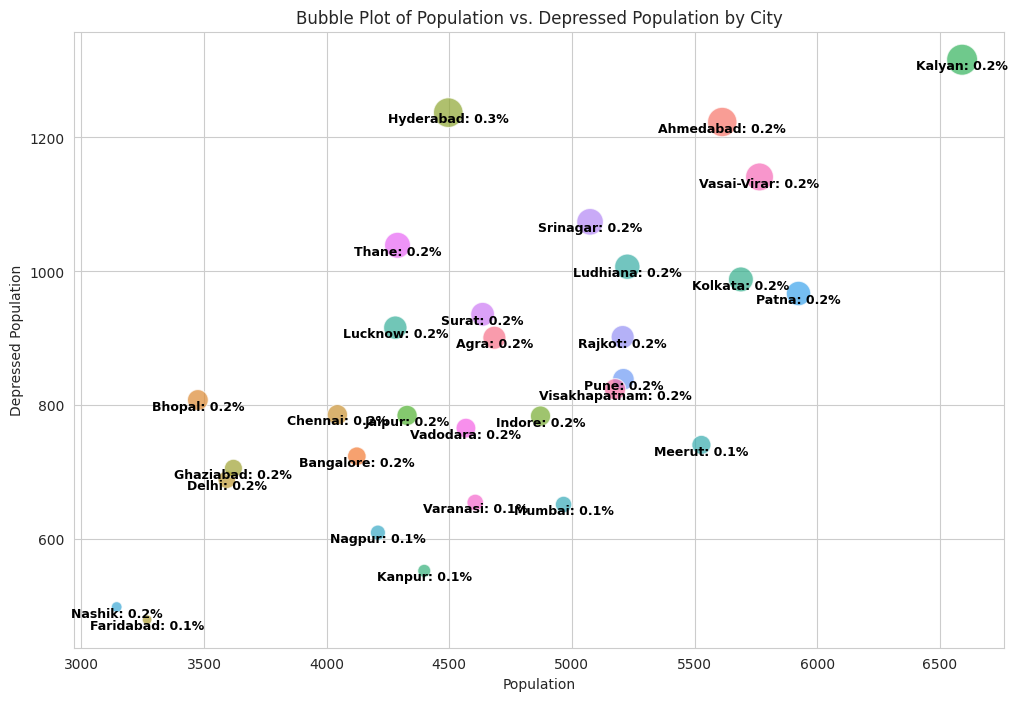

In [125]:
# Creating a color palette based on the unique cities
unique_cities = city_dep['City'].unique()
palette = sns.color_palette("husl", len(unique_cities))

# Map colors to cities
color_map = {city: palette[i] for i, city in enumerate(unique_cities)}

#Creating a scatter plot
plt.figure(figsize=(12, 8)) 
scatter = sns.scatterplot(
    x='Population',
    y='Dep_population',
    data=city_dep,
    size='Dep_population',
    sizes=(50, 500),
    alpha=0.7,
    legend=False,
    hue='City',
    palette=color_map
)

# Annotate the bubbles with the city names and "Depressed %" values
for i in range(city_dep.shape[0]):
    plt.text(
        city_dep['Population'].iloc[i],
        city_dep['Dep_population'].iloc[i],
        f"{city_dep['City'].iloc[i]}: {city_dep['Depressed %'].iloc[i]:.1f}%",  # Include city name
        horizontalalignment='center',
        verticalalignment='top',
        fontsize=9,
        color='black', 
        weight='bold'
    )

# Set the title and labels
plt.title('Bubble Plot of Population vs. Depressed Population by City')
plt.xlabel('Population')
plt.ylabel('Depressed Population')

# Show the plot
plt.show()


In [65]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
